# LeeQ Example notebook

This notebook provides the examples of basic usage of the LeeQ software

## Load the environment

In [1]:
import leeq
from simulated_setup import * # Change to your customized setup file
import numpy as np
from scipy import optimize as so
from leeq.experiments.builtin import *
import plotly.graph_objects as go
from labchronicle import log_and_record, register_browser_function

from leeq.utils.compatibility import *
from leeq.core.elements.built_in.qudit_transmon import TransmonElement
from leeq.experiments.builtin import *

## Initialize qubits configuration

In [2]:
simulation_setup()

# setup().start_live_monitor() # When needed you can setup the live monitor.
setup().status().set_param("Shot_Number", 500)
setup().status().set_param("Shot_Period", 500)                              
  
dut_dict = {
    'Q1': {'Active': True, 'Tuneup': False,'FromLog':False, 'Params': configuration_a},
    'Q2': {'Active': True, 'Tuneup': False,'FromLog':False, 'Params': configuration_b}
} 


[2024-07-04 18:25:22] [INFO] [labchronicle.chronicle] Log started at log/coxious/2024-07/2024-07-04/18.25.22
[2024-07-04 18:25:22] [INFO] [labchronicle.chronicle] Log started at log/coxious/2024-07/2024-07-04/18.25.22
INFO:labchronicle.chronicle:Log started at log/coxious/2024-07/2024-07-04/18.25.22


MeasurementCalibrationMultilevelGMM.run


<IPython.core.display.JSON object>

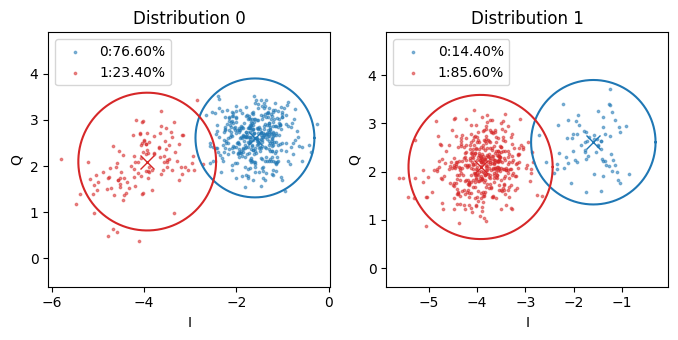

<IPython.core.display.JSON object>

MeasurementCalibrationMultilevelGMM.run


<IPython.core.display.JSON object>

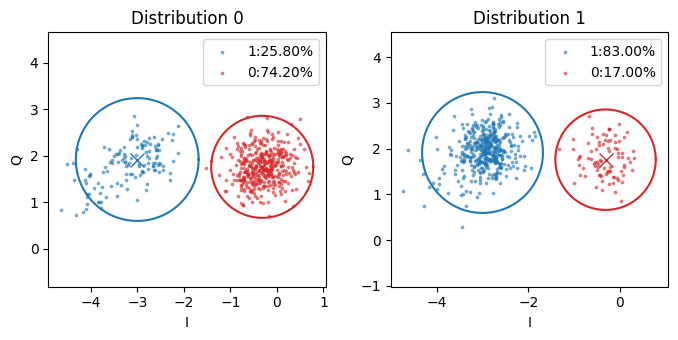

<IPython.core.display.JSON object>

In [3]:
duts_dict = {}
for hrid, dd in dut_dict.items():
    if (dd['Active']):
        if (dd['FromLog']):
            dut = TransmonElement.load_from_calibration_log(dd['Params']['hrid'])
        else:
            dut = TransmonElement(name=dd['Params']['hrid'],parameters=dd['Params'])
            
        if (dd['Tuneup']):
            dut.save_calibration_log()
        else:
            lpb_scan = (dut.get_c1('f01')['I'], dut.get_c1('f01')['X'])
            calib = MeasurementCalibrationMultilevelGMM(dut, mprim_index=0,sweep_lpb_list=lpb_scan)
        dut.print_config_info()
        duts_dict[hrid] = dut

dut = None

# Resonators Spectroscopy

ResonatorSweepTransmissionWithExtraInitialLPB.run


<IPython.core.display.JSON object>

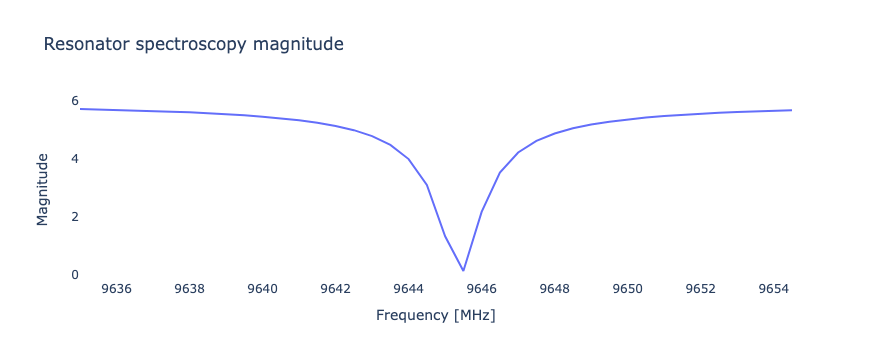

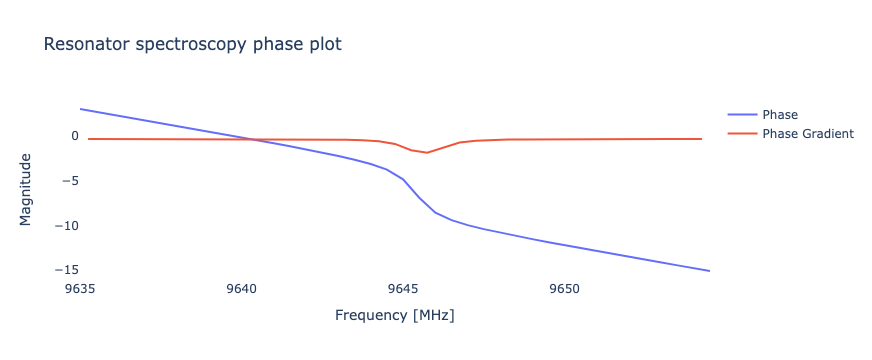

Phase gradient fit f0:9645.445187913383, Q:23789.89963391461, amp:5.1166324836673285, base:-0.45410725888487213 kappa:0.405443


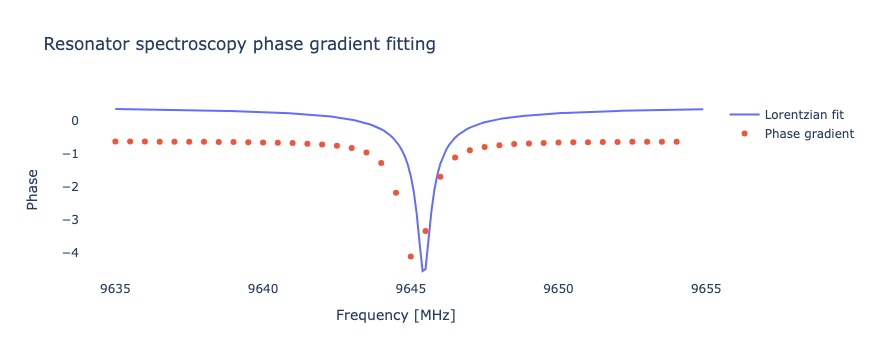

<Experiment: ResonatorSweepTransmissionWithExtraInitialLPB>

In [7]:
dut = duts_dict['Q1']                                # device under test (qubit and resonator pair)
mprim = dut.get_measurement_prim_intlist(0)         # resonator measurement params
c1 = dut.get_c1('f01')                              # qubit pulse collection

ResonatorSweepTransmissionWithExtraInitialLPB(dut,
            start = 9645-10,
            stop  = 9645+10,
            step = 0.5,
            num_avs = 10000,
            rep_rate = 0.0,
            mp_width = 8,
            amp=0.03
)

## Qubits Tuneup

### Manually update parameters

MeasurementCalibrationMultilevelGMM.run


<IPython.core.display.JSON object>

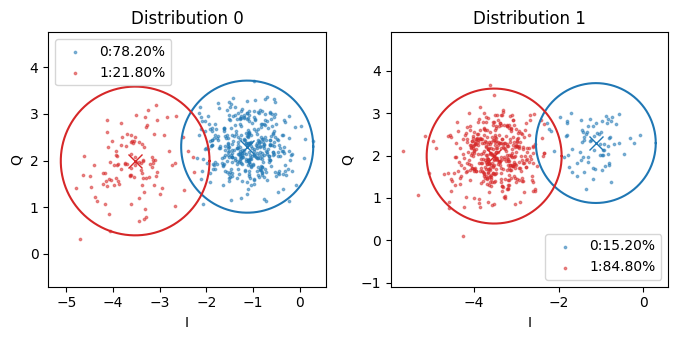

In [8]:
dut = duts_dict['Q1']                                # device under test (qubit and resonator pair)
mprim = dut.get_measurement_prim_intlist(0)          # resonator measurement params
c1 = dut.get_c1('f01')                               # qubit pulse collection

c1['X'].update_freq(5040.1)

c1['X'].update_pulse_args(amp=0.11, width=0.05)

mprim.update_freq(9645.6)                     # from resonator spectroscopy  

# mprim.update_freq(10000.4)      

# mprim.update_freq(9999.198288343621)      
mprim.update_pulse_args(amp=0.08, width=8)                   

lpb_scan = (dut.get_c1('f01')['I'], dut.get_c1('f01')['X'])

calib = MeasurementCalibrationMultilevelGMM(dut, mprim_index=0,sweep_lpb_list=lpb_scan)

### Calibrate single qubit pulse amplitute

NormalisedRabi.run
Amplitude updated: 0.5496948493601495


<IPython.core.display.JSON object>

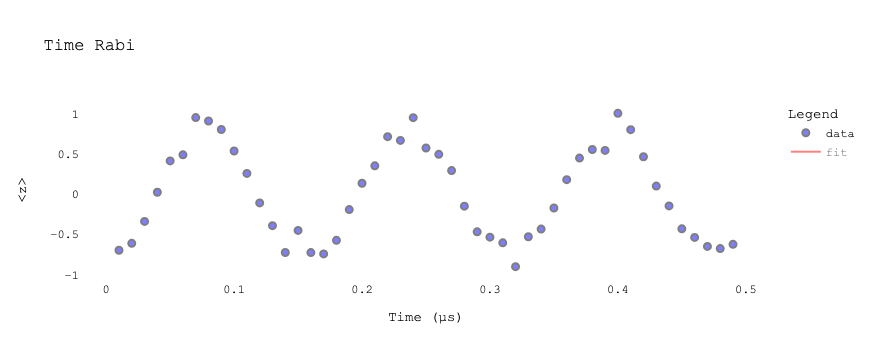

In [9]:
rabi = NormalisedRabi(dut_qubit=dut,step=0.01,stop=0.5, amp=0.19905818643939352,update=True)

### Calibrate single qubit gate frequency then amplitute again

SimpleRamseyMultilevel.run


<IPython.core.display.JSON object>

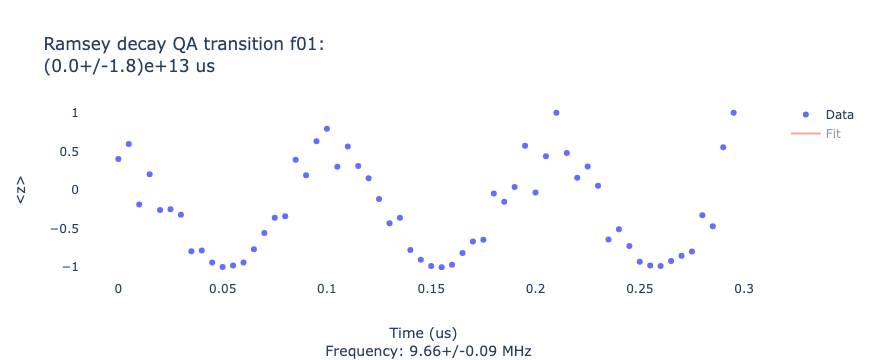

SimpleRamseyMultilevel.run


<IPython.core.display.JSON object>

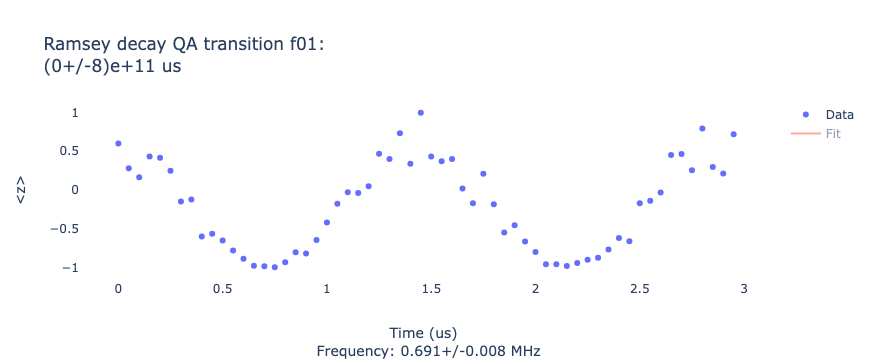

SimpleRamseyMultilevel.run


<IPython.core.display.JSON object>

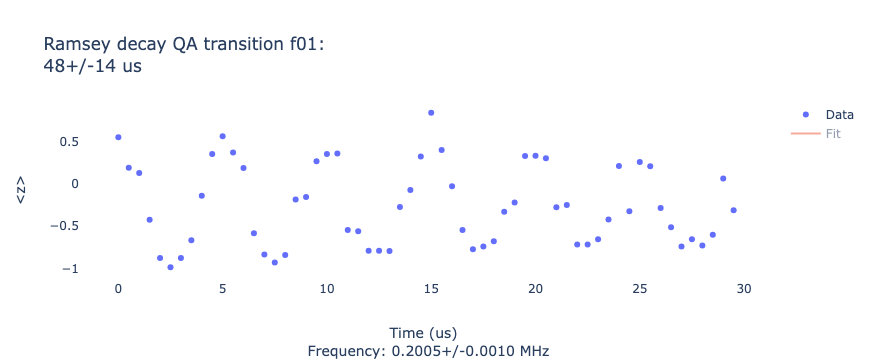

NormalisedRabi.run
Amplitude updated: 0.5485918918885211


<IPython.core.display.JSON object>

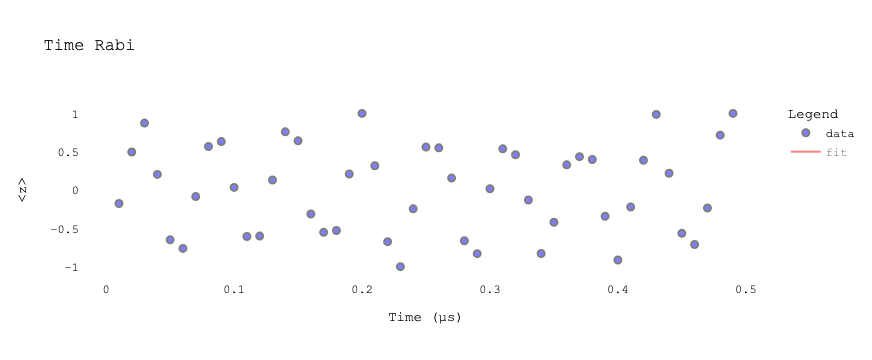

In [10]:
# Ramsey
ramsey = SimpleRamseyMultilevel(qubit=dut,set_offset=10,stop=0.3,step=0.005)
ramsey = SimpleRamseyMultilevel(qubit=dut,set_offset=1,stop=3,step=0.05)
ramsey = SimpleRamseyMultilevel(qubit=dut,set_offset=0.1,stop=30,step=0.5)
    
# Rabi
rabi = NormalisedRabi(dut_qubit=dut,step=0.01,stop=0.5, amp=0.5496948493601495,update=True)

In [ ]:
dut  =duts_dict['Q1']

lpb_scan = (dut.get_c1('f01')['I'], dut.get_c1('f01')['X'])

center = 9997.4

MeasurementScanParams(
    dut = duts_dict['Q1'],
    sweep_lpb_list = lpb_scan,
    mprim_index = 0,
    amp_scan = {
        'start':0.001,
        'stop':0.05,
        'step':0.005
    },
    freq_scan = {
    'start':center-1,
    'stop':center+0.5,
    'step' : 0.2,
    }
)

MeasurementScanParams(
    dut = duts_dict['Q1'],
    sweep_lpb_list = lpb_scan,
    mprim_index = 0,
    amp_scan = None,
    freq_scan = {
    'start':center-1,
    'stop':center+0.5,
    'step' : 0.2,
    }
)


MeasurementScanParams(
    dut = duts_dict['Q1'],
    sweep_lpb_list = lpb_scan,
    mprim_index = 0,
    amp_scan = {
        'start':0.001,
        'stop':0.08,
        'step':0.005
    },
    freq_scan = None
)

### Tune up again with the optimal readout parameters

Calibrating alpha by all XY f01
CrossAllXYDragMultiSingleQubitMultilevel.run


<IPython.core.display.JSON object>

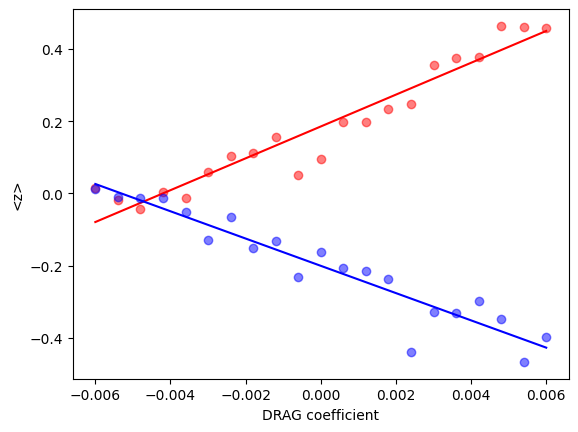

Guessed alpha: -212.17636595790037
alpha_lower: None alpha_higher: 1000000000.0
CrossAllXYDragMultiSingleQubitMultilevel.run


<IPython.core.display.JSON object>

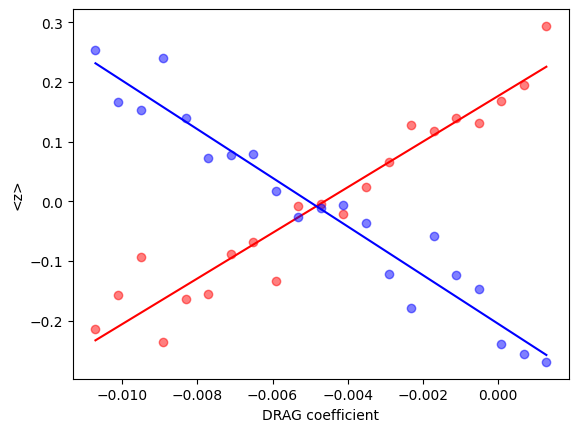

Guessed alpha: -206.96443185566608


<IPython.core.display.JSON object>

In [5]:
# Ramsey
#ramsey = SimpleRamseyMultilevel(qubit=dut,set_offset=10,stop=0.3,step=0.005)
#ramsey = SimpleRamseyMultilevel(qubit=dut,set_offset=1,stop=3,step=0.05)
#ramsey = SimpleRamseyMultilevel(qubit=dut,set_offset=0.1,stop=30,step=0.5)
    
# Rabi
#rabi = NormalisedRabi(dut_qubit=dut,step=0.01,stop=0.5, amp=0.19905818643939352,update=True)
    
# pingpong
#setup().status().set_param('Engine_Batch_Size',1)
#pingpong = AmpTuneUpSingleQubitMultilevel(
#        dut = dut
#    )
    
dut = duts_dict['Q1']
# Drag
drag = CrossAllXYDragMultiRunSingleQubitMultilevel(
        dut = dut
    )

In [ ]:
duts_dict['Q1'].save_calibration_log()

### Run randomized benchmarking

In [ ]:
rb_q1 = RandomizedBenchmarkingTwoLevelSubspaceMultilevelSystem(
        dut_list=[duts_dict['Q1']],
        kinds=10,
        seq_length=np.arange(0, 1000, 64)
    )

### Coherence (T1 T2 echo T2 ramsey)

In [ ]:
SimpleT1(qubit=duts_dict['Q1'],time_length=300,time_resolution=5)
SpinEchoMultiLevel(qubit=duts_dict['Q1'],free_evolution_time=300,time_resolution=5)
ramsey = SimpleRamseyMultilevel(
    qubit=duts_dict['Q1'],
    stop=50,
    step=0.25,
    set_offset=0.2
)